In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('fraudTrain.csv')

In [356]:
df1=df.copy()

In [357]:
pd.set_option('display.max_columns',None)
df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [358]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [ ]:
# There is no null values in the data

In [300]:
print('The shape of the data:',df1.shape)

The shape of the data: (1296675, 22)


0    1289169
1       7506
Name: is_fraud, dtype: int64


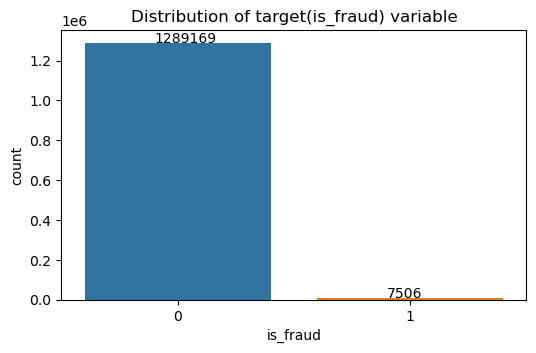

In [8]:
# Visualizing the distribution of target variable 'is_fraud'

print(df1['is_fraud'].value_counts())

plt.figure(figsize=(6,3.5))
ax=sns.countplot(x='is_fraud',data=df1)
plt.title('Distribution of target(is_fraud) variable')
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.3,p.get_height()+50))

In [12]:
# Data is highly imbalanced.

print('The percentage of majority class in target variable is ',df1['is_fraud'].value_counts()[0]/len(df1)*100)
print('The percentage of minority class in target variable is ',df1['is_fraud'].value_counts()[1]/len(df1)*100)

The percentage of majority class in target variable is  99.42113482561166
The percentage of minority class in target variable is  0.5788651743883394


In [359]:
# This data need to be under_sampled before modelling

ind=df1.drop('is_fraud',axis=1)
dep=df1['is_fraud']

In [360]:
# Under_sampling
# To avoid information loss,we are taking the majoritu class count upto 2*minority count

from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(sampling_strategy=0.5,random_state=42)
x_rus,y_rus=rus.fit_resample(ind,dep)

In [361]:
print(x_rus.shape)
x_rus.head(3)

(22518, 21)


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
811778,2019-12-07 10:55:06,676173792455,"fraud_Zieme, Bode and Dooley",gas_transport,86.19,Brittany,Cox,F,07177 William Dale Apt. 547,Santa Monica,CA,90403,34.0287,-118.4924,92043,"Civil engineer, contracting",1961-04-25,f32d1f4b2a918f4c2f6acdc83033ee35,1354877706,33.287851,-118.740970
1101718,2020-04-03 13:10:06,30518206766474,fraud_Lind-Buckridge,entertainment,85.81,Tamara,Martinez,F,471 Marquez Prairie Suite 680,Matthews,MO,63867,36.7154,-89.6287,1019,Aeronautical engineer,1979-01-26,f5dad8e2d7c39d81502d846a20286659,1364994606,36.539950,-89.857416
800013,2019-12-04 07:07:04,4658490815480264,fraud_Hackett-Lueilwitz,grocery_pos,99.30,Tara,Richards,F,4879 Cristina Station,Keisterville,PA,15449,39.9636,-79.7853,184,Systems developer,1945-11-04,1d023bc78ab93ab65a35bbb53bcc67bd,1354604824,39.582872,-78.838550


In [334]:
y_rus.shape
y_rus

811778     0
1101718    0
800013     0
398945     0
207455     0
          ..
1295399    1
1295491    1
1295532    1
1295666    1
1295733    1
Name: is_fraud, Length: 22518, dtype: int64

0    15012
1     7506
Name: is_fraud, dtype: int64


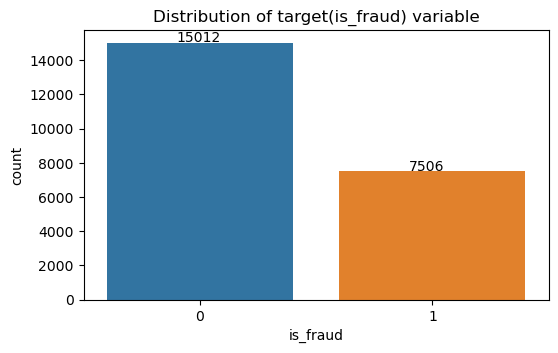

In [7]:
# Visualizing the distribution of target variable 'is_fraud'

print(y_rus.value_counts())

plt.figure(figsize=(6,3.5))
ax=sns.countplot(x=y_rus.index,data=y_rus)
plt.title('Distribution of target(is_fraud) variable')
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.3,p.get_height()+50))

In [362]:
# Combining the independent and dependent variables together as a data to proceed further

undersampled_df=pd.DataFrame(x_rus,columns=ind.columns)
undersampled_df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
811778,2019-12-07 10:55:06,676173792455,"fraud_Zieme, Bode and Dooley",gas_transport,86.19,Brittany,Cox,F,07177 William Dale Apt. 547,Santa Monica,CA,90403,34.0287,-118.4924,92043,"Civil engineer, contracting",1961-04-25,f32d1f4b2a918f4c2f6acdc83033ee35,1354877706,33.287851,-118.740970
1101718,2020-04-03 13:10:06,30518206766474,fraud_Lind-Buckridge,entertainment,85.81,Tamara,Martinez,F,471 Marquez Prairie Suite 680,Matthews,MO,63867,36.7154,-89.6287,1019,Aeronautical engineer,1979-01-26,f5dad8e2d7c39d81502d846a20286659,1364994606,36.539950,-89.857416
800013,2019-12-04 07:07:04,4658490815480264,fraud_Hackett-Lueilwitz,grocery_pos,99.30,Tara,Richards,F,4879 Cristina Station,Keisterville,PA,15449,39.9636,-79.7853,184,Systems developer,1945-11-04,1d023bc78ab93ab65a35bbb53bcc67bd,1354604824,39.582872,-78.838550


In [363]:
undersampled_df['is_fraud']=y_rus
undersampled_df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
811778,2019-12-07 10:55:06,676173792455,"fraud_Zieme, Bode and Dooley",gas_transport,86.19,Brittany,Cox,F,07177 William Dale Apt. 547,Santa Monica,CA,90403,34.0287,-118.4924,92043,"Civil engineer, contracting",1961-04-25,f32d1f4b2a918f4c2f6acdc83033ee35,1354877706,33.287851,-118.740970,0
1101718,2020-04-03 13:10:06,30518206766474,fraud_Lind-Buckridge,entertainment,85.81,Tamara,Martinez,F,471 Marquez Prairie Suite 680,Matthews,MO,63867,36.7154,-89.6287,1019,Aeronautical engineer,1979-01-26,f5dad8e2d7c39d81502d846a20286659,1364994606,36.539950,-89.857416,0
800013,2019-12-04 07:07:04,4658490815480264,fraud_Hackett-Lueilwitz,grocery_pos,99.30,Tara,Richards,F,4879 Cristina Station,Keisterville,PA,15449,39.9636,-79.7853,184,Systems developer,1945-11-04,1d023bc78ab93ab65a35bbb53bcc67bd,1354604824,39.582872,-78.838550,0


In [364]:
# Resetting the index

undersampled_df.reset_index(drop=True,inplace=True)

In [365]:
undersampled_df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-12-07 10:55:06,676173792455,"fraud_Zieme, Bode and Dooley",gas_transport,86.19,Brittany,Cox,F,07177 William Dale Apt. 547,Santa Monica,CA,90403,34.0287,-118.4924,92043,"Civil engineer, contracting",1961-04-25,f32d1f4b2a918f4c2f6acdc83033ee35,1354877706,33.287851,-118.740970,0
1,2020-04-03 13:10:06,30518206766474,fraud_Lind-Buckridge,entertainment,85.81,Tamara,Martinez,F,471 Marquez Prairie Suite 680,Matthews,MO,63867,36.7154,-89.6287,1019,Aeronautical engineer,1979-01-26,f5dad8e2d7c39d81502d846a20286659,1364994606,36.539950,-89.857416,0
2,2019-12-04 07:07:04,4658490815480264,fraud_Hackett-Lueilwitz,grocery_pos,99.30,Tara,Richards,F,4879 Cristina Station,Keisterville,PA,15449,39.9636,-79.7853,184,Systems developer,1945-11-04,1d023bc78ab93ab65a35bbb53bcc67bd,1354604824,39.582872,-78.838550,0


In [46]:
# Saving the undersampled_df in a csv file

file='undersampled_data.csv'
undersampled_df.to_csv(file,index=False)
print(f'The undersampled data has been saved to {file}')

The undersampled data has been saved to undersampled_data.csv


In [ ]:
# EDA

In [48]:
# Let us see the number of unique values and their percentage out of total values

for i in undersampled_df.columns:
    print('No of unique and their % of column',format(i))
    print(undersampled_df[i].nunique())
    print(undersampled_df[i].nunique()/len(undersampled_df)*100)
    print('-------------------------------------------------')

No of unique and their % of column trans_date_trans_time
22508
99.9555910826894
-------------------------------------------------
No of unique and their % of column cc_num
983
4.3653965716315835
-------------------------------------------------
No of unique and their % of column merchant
693
3.077537969624301
-------------------------------------------------
No of unique and their % of column category
14
0.06217248423483436
-------------------------------------------------
No of unique and their % of column amt
14502
64.40181188382627
-------------------------------------------------
No of unique and their % of column first
352
1.563193889332978
-------------------------------------------------
No of unique and their % of column last
481
2.136068922639666
-------------------------------------------------
No of unique and their % of column gender
2
0.008881783462119193
-------------------------------------------------
No of unique and their % of column street
983
4.3653965716315835
----

In [366]:
# Based on the above data:
# columns:-'trans_date_trans_time','trans_num','unix_time','merch_lat','merch_long' has 100% unique values
# So they can be dropped

undersampled_df.drop(columns=['trans_date_trans_time','trans_num','unix_time','merch_lat','merch_long'],axis=1,inplace=True)

In [367]:
# Combining first and last names of the customer & removing 'first' & 'last' columns

undersampled_df['cust_name']=undersampled_df['first']+' '+undersampled_df['last']

undersampled_df.drop(columns=['first','last'],axis=1,inplace=True)

In [145]:
undersampled_df.head(3)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,is_fraud
0,676173792455,"fraud_Zieme, Bode and Dooley",gas_transport,86.19,Brittany,Cox,F,07177 William Dale Apt. 547,Santa Monica,CA,90403,34.0287,-118.4924,92043,"Civil engineer, contracting",1961-04-25,0
1,30518206766474,fraud_Lind-Buckridge,entertainment,85.81,Tamara,Martinez,F,471 Marquez Prairie Suite 680,Matthews,MO,63867,36.7154,-89.6287,1019,Aeronautical engineer,1979-01-26,0
2,4658490815480264,fraud_Hackett-Lueilwitz,grocery_pos,99.30,Tara,Richards,F,4879 Cristina Station,Keisterville,PA,15449,39.9636,-79.7853,184,Systems developer,1945-11-04,0


In [368]:
undersampled_df['merchant'].replace({',':'','-':' ','_':' '},regex=True,inplace=True)

In [369]:
# Age can be calculated from 'dob column'

# Saving present date in a variable to calculate age and converting dob string to datetime format
from datetime import date

today=pd.to_datetime(date.today())
print(today)

undersampled_df['dob']=pd.to_datetime(undersampled_df['dob'])

2023-11-18 00:00:00


In [370]:
# Function to calculate age

def cal_age(dob):
    age=int((today-dob).days/365.2425)
    return age

In [371]:
undersampled_df['age']=undersampled_df['dob'].apply(cal_age)

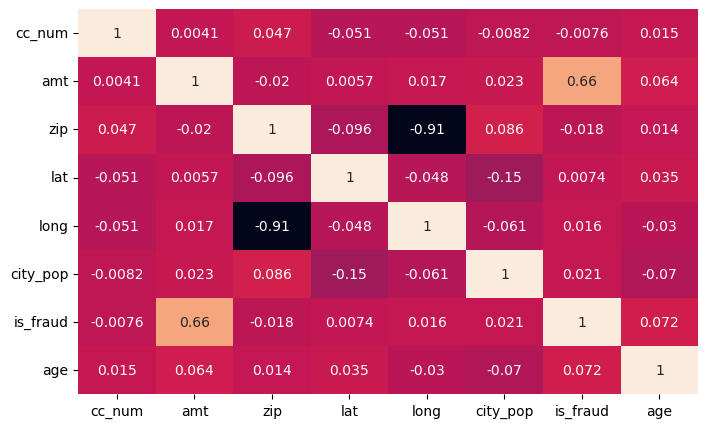

In [149]:
# Lets check correlation 

plt.figure(figsize=(8,5))
sns.heatmap(undersampled_df.corr(),annot=True,cbar=False)
plt.show()

In [372]:
# columns 'zip' & 'long' have high collinearity. Hence one can be dropped
# we are dropping the zip column along with dob column

undersampled_df.drop(columns=['zip','dob'],axis=1,inplace=True)

In [164]:
undersampled_df.head(3)

,cc_num,merchant,category,amt,gender,street,city,state,lat,long,city_pop,job,is_fraud,age,cust_name
0,676173792455,"fraud_Zieme, Bode and Dooley",gas_transport,86.19,F,07177 William Dale Apt. 547,Santa Monica,CA,34.0287,-118.4924,92043,"Civil engineer, contracting",0,62,Brittany Cox
1,30518206766474,fraud_Lind-Buckridge,entertainment,85.81,F,471 Marquez Prairie Suite 680,Matthews,MO,36.7154,-89.6287,1019,Aeronautical engineer,0,44,Tamara Martinez
2,4658490815480264,fraud_Hackett-Lueilwitz,grocery_pos,99.30,F,4879 Cristina Station,Keisterville,PA,39.9636,-79.7853,184,Systems developer,0,78,Tara Richards


In [373]:
# saving numerical & categorical columns for easy interpretation

num_col=undersampled_df.select_dtypes(exclude='object').columns.tolist()
cat_col=undersampled_df.select_dtypes(include='object').columns.tolist()


In [374]:
num_col.remove('is_fraud')
num_col.remove('cc_num')

In [375]:
cat_col.append('cc_num')

In [152]:
# Univariate analysis

def uni(col):
    plt.figure(figsize=(8,4))
    sns.countplot(x=col,data=undersampled_df,order=undersampled_df[col].value_counts().head(25).index)
    plt.xticks(rotation=90)
    plt.title(f"Analysis of '{col}' variable")

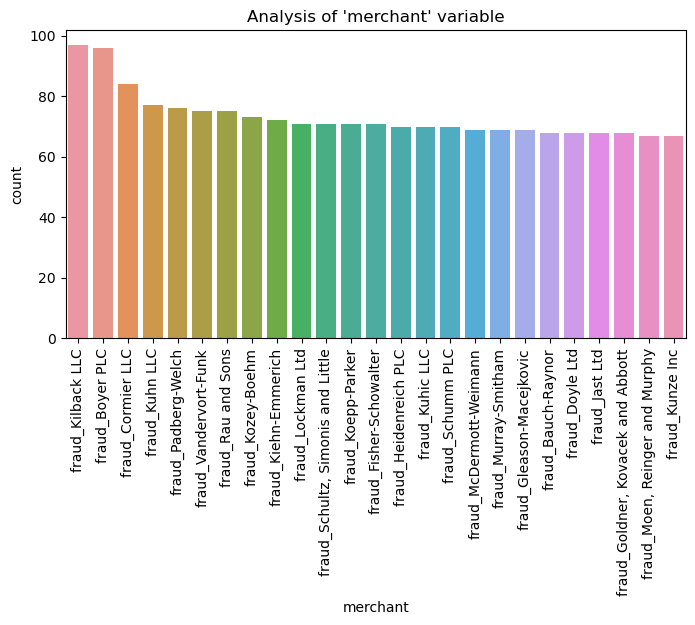

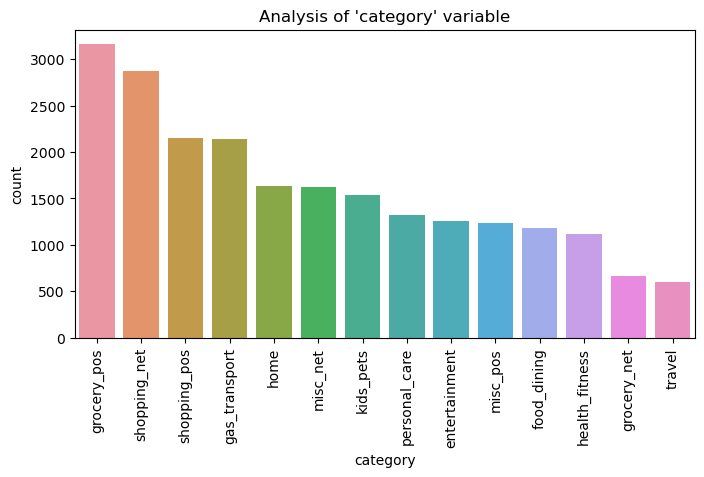

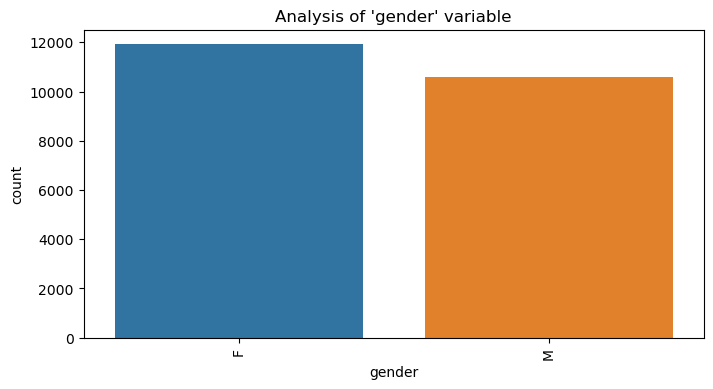

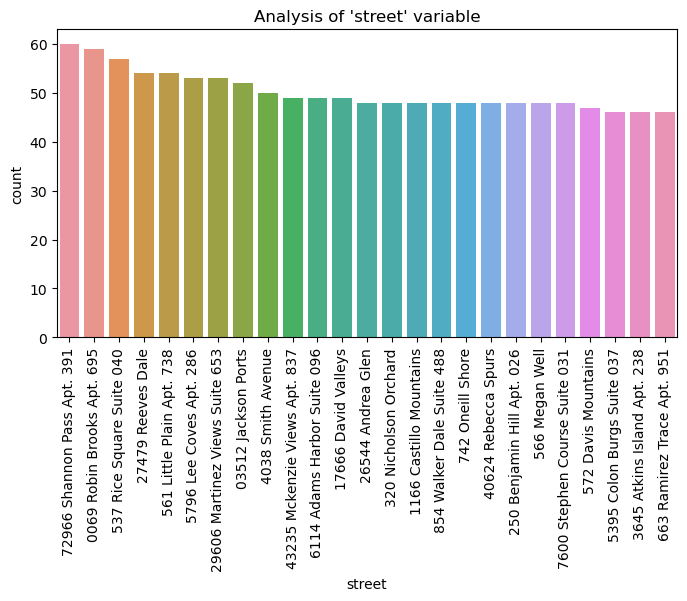

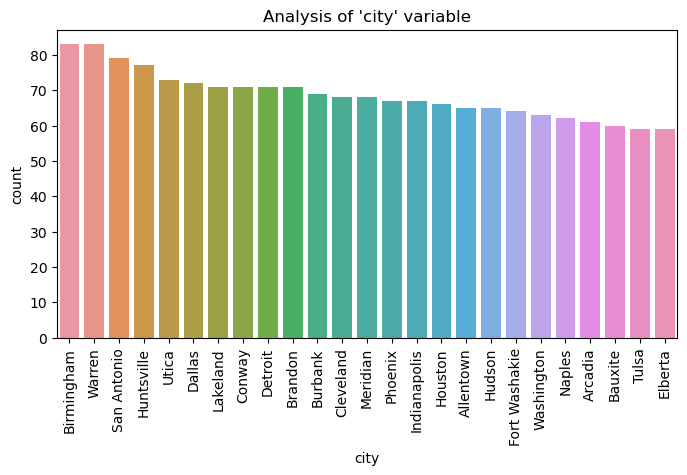

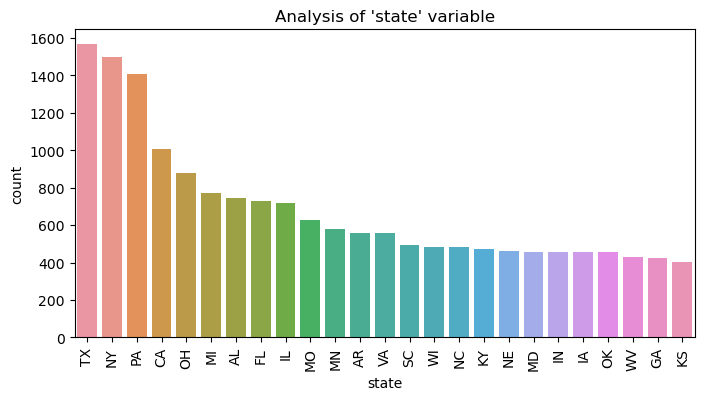

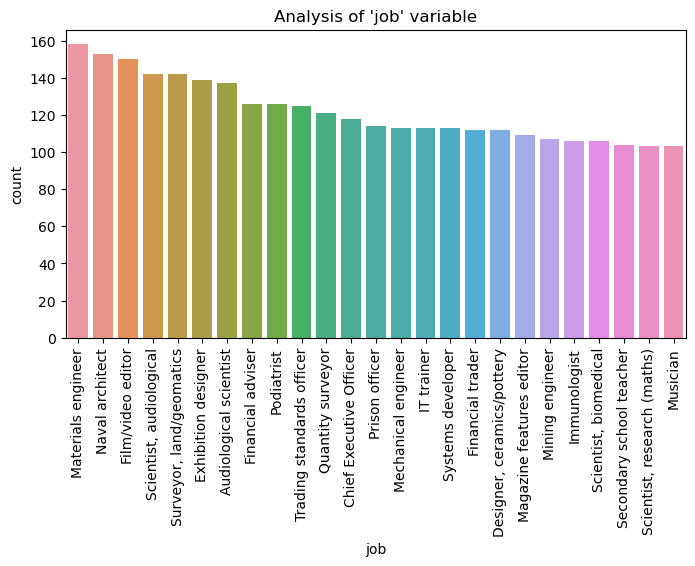

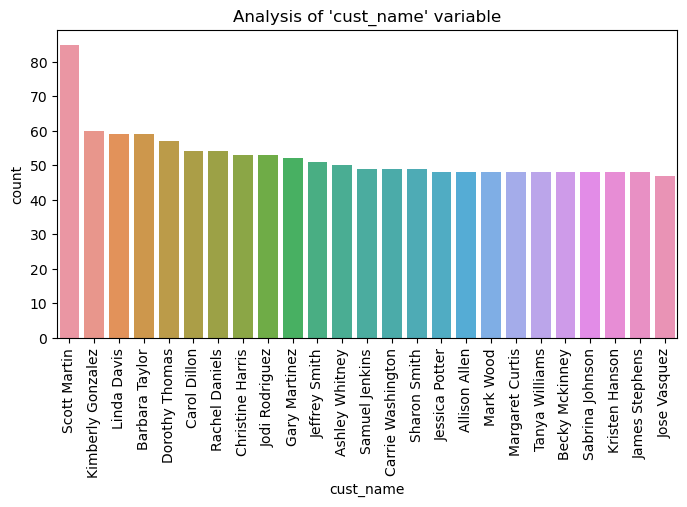

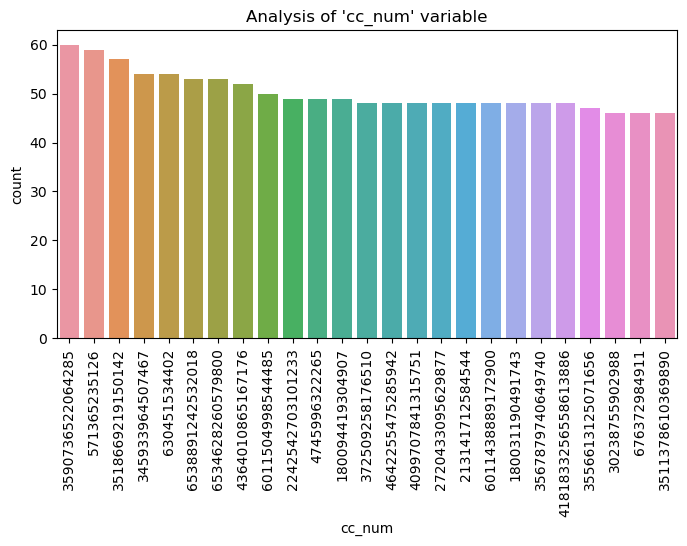

In [228]:
for i in cat_col:
    uni(i)

In [ ]:
# Observations

# Top classes in each varaible was seen besed on the count of credit card transactions,

In [200]:
# Bivariate analysis

# Numerical

def num_bivar(col):
    plt.figure(figsize=(5,4))
    ax=sns.barplot(x='is_fraud',y=col,data=undersampled_df,order=undersampled_df['is_fraud'].value_counts().index,ci=None)
    for p in ax.patches:
        ax.annotate(int(p.get_height()),(p.get_x()+0.3,p.get_height()+0.2))
    plt.title(f"Analysis of '{col}' and 'is_fraud'(target) variables")

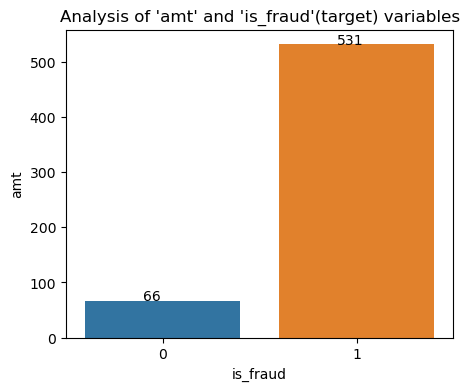

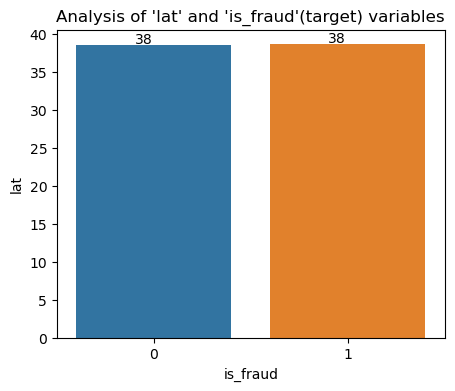

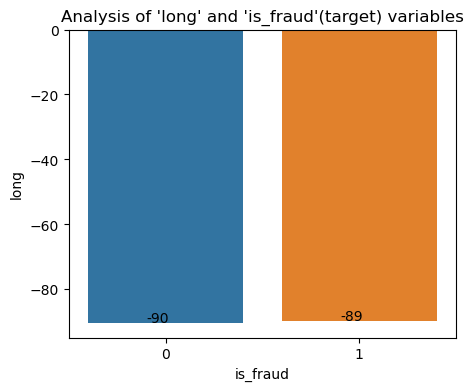

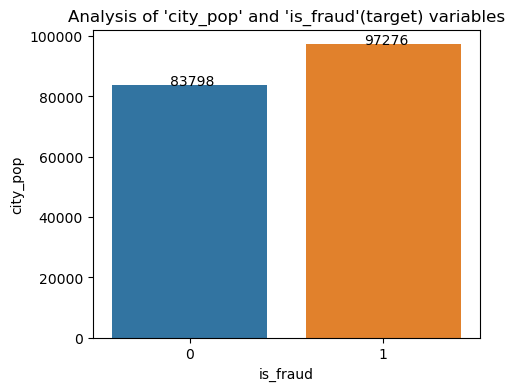

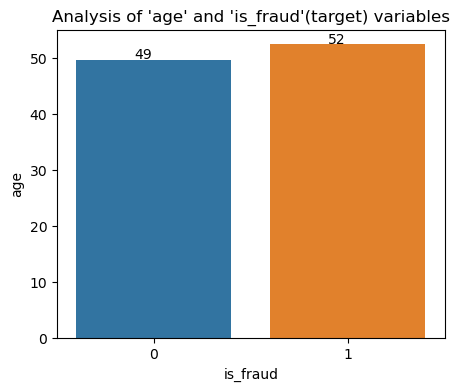

In [229]:
for i in num_col:
    num_bivar(i)

In [ ]:
# Observation

# Fraud transactions have high amount range
# Slightly high age has more count of fraud transactions


In [245]:
# Categorical

def cat_bivar(col):
    plt.figure(figsize=(8,5))
    sns.countplot(x=col,data=undersampled_df,hue='is_fraud',order=undersampled_df[col].value_counts().head(25).index)
    plt.xticks(rotation=90)
    plt.title(f"Analysis of '{col}' and 'is_fraud'(target) variables")

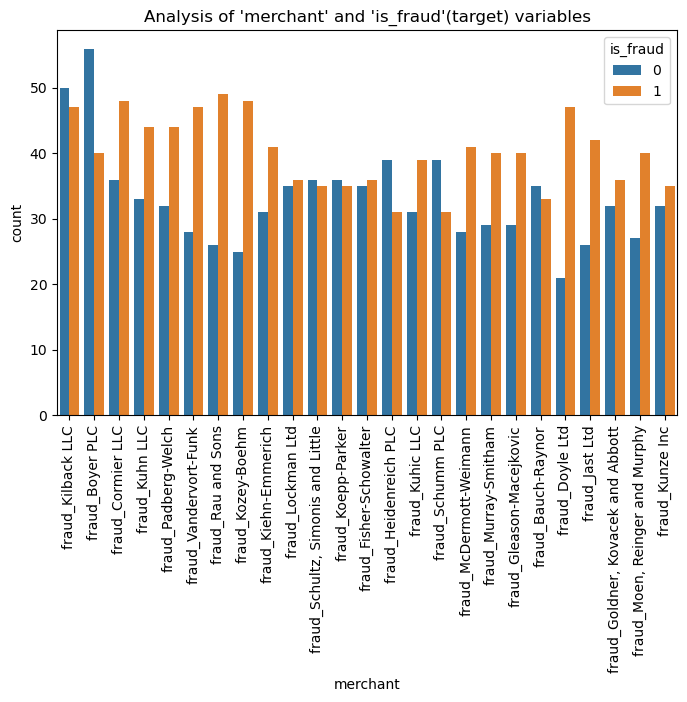

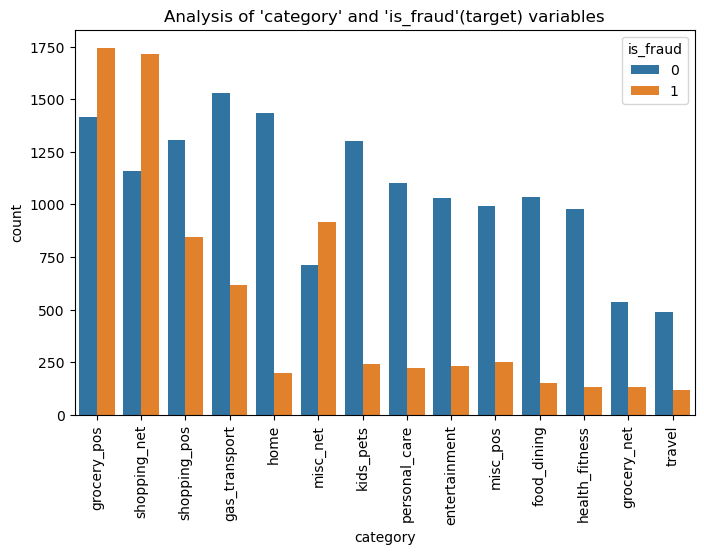

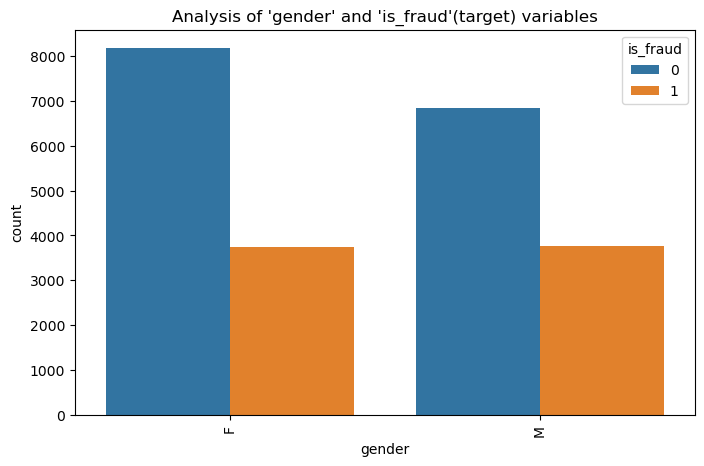

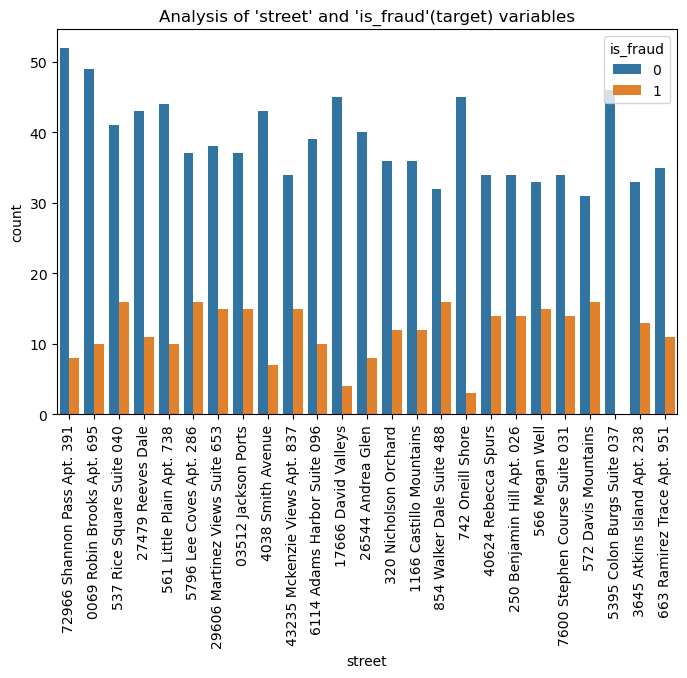

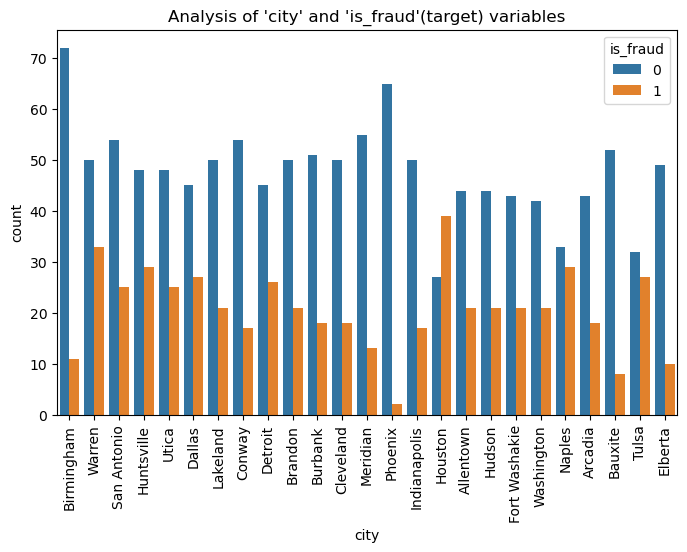

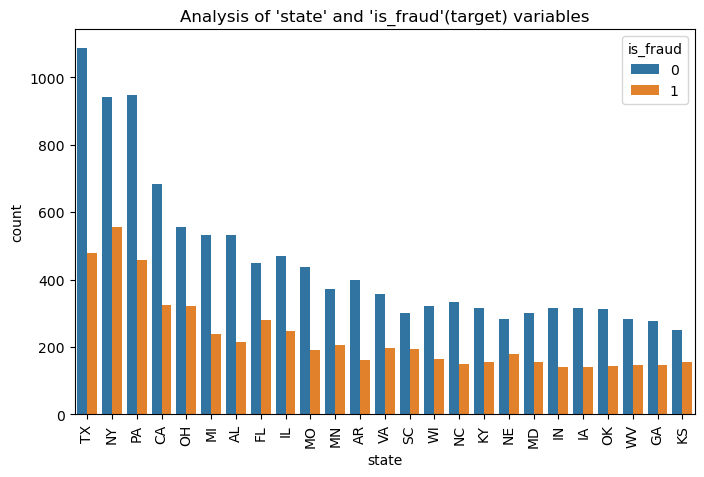

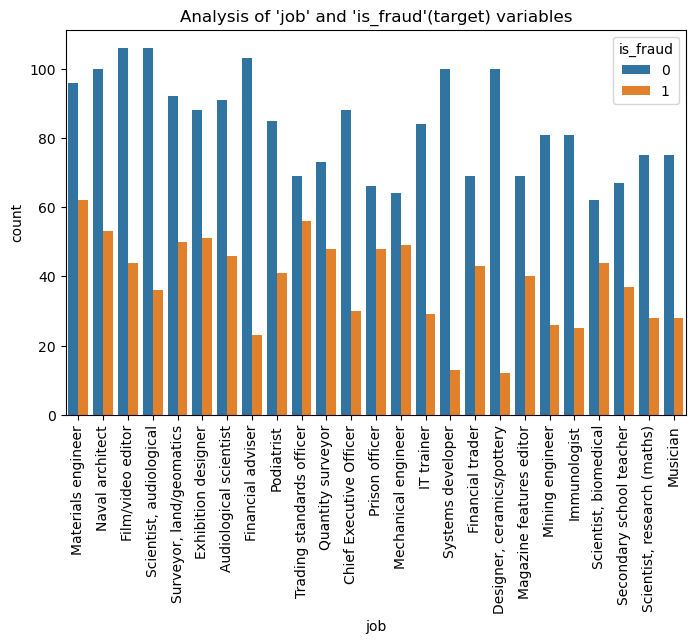

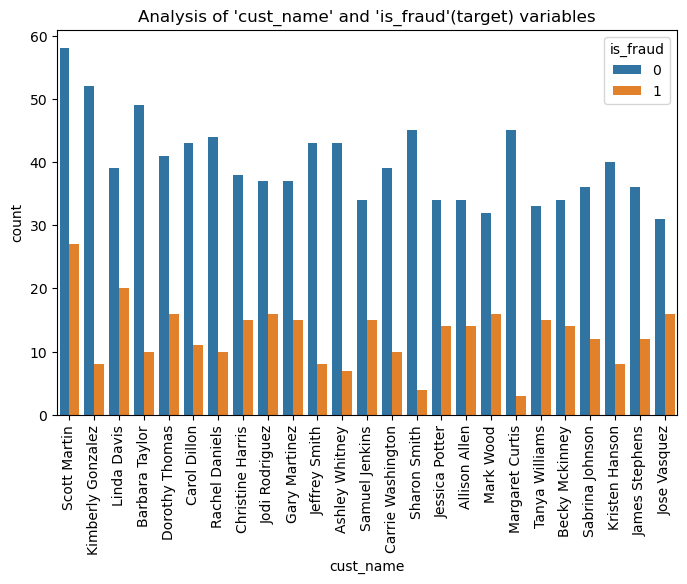

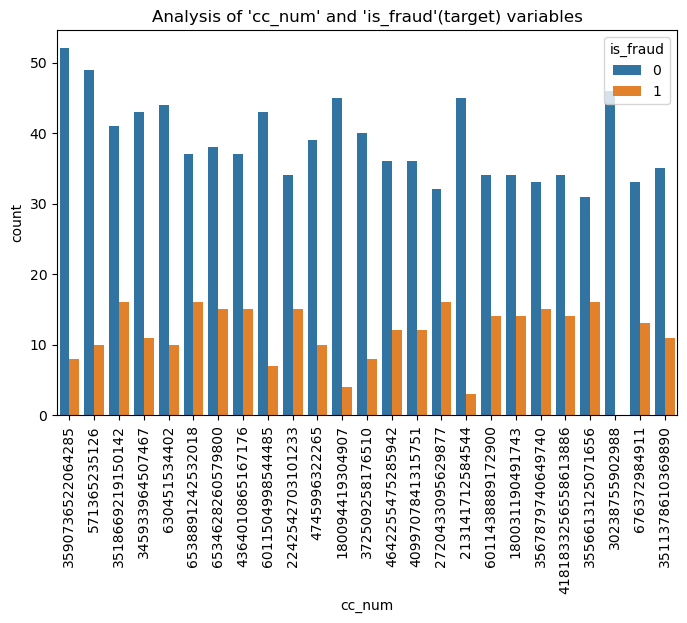

In [247]:
for i in cat_col:
    cat_bivar(i)

In [ ]:
# Observations

# 'grocery_pos' is the catehory in which there is high fruad txn count
# Almost both men and women have faced the same count of fraud txn
# houston city has the highest count of fraud txn 
# NY city has highest fraud count txn
# Customers who does job of Materials engineer has high number of fraud txn


In [248]:
undersampled_df.head(3)

,cc_num,merchant,category,amt,gender,street,city,state,lat,long,city_pop,job,is_fraud,age,cust_name
0,676173792455,"fraud_Zieme, Bode and Dooley",gas_transport,86.19,F,07177 William Dale Apt. 547,Santa Monica,CA,34.0287,-118.4924,92043,"Civil engineer, contracting",0,62,Brittany Cox
1,30518206766474,fraud_Lind-Buckridge,entertainment,85.81,F,471 Marquez Prairie Suite 680,Matthews,MO,36.7154,-89.6287,1019,Aeronautical engineer,0,44,Tamara Martinez
2,4658490815480264,fraud_Hackett-Lueilwitz,grocery_pos,99.30,F,4879 Cristina Station,Keisterville,PA,39.9636,-79.7853,184,Systems developer,0,78,Tara Richards


In [22]:
# Multivariable analysis

def multi_var(col1,col2):
    plt.figure(figsize=(8,5))
    sns.barplot(x=col1,y=col2,data=undersampled_df,hue='is_fraud',order=undersampled_df[col1].value_counts().head(25).index,ci=None)
    plt.xticks(rotation=90)
    plt.title(f"Analysis of '{col1}','{col2}' and 'is_fraud'(target) variables")

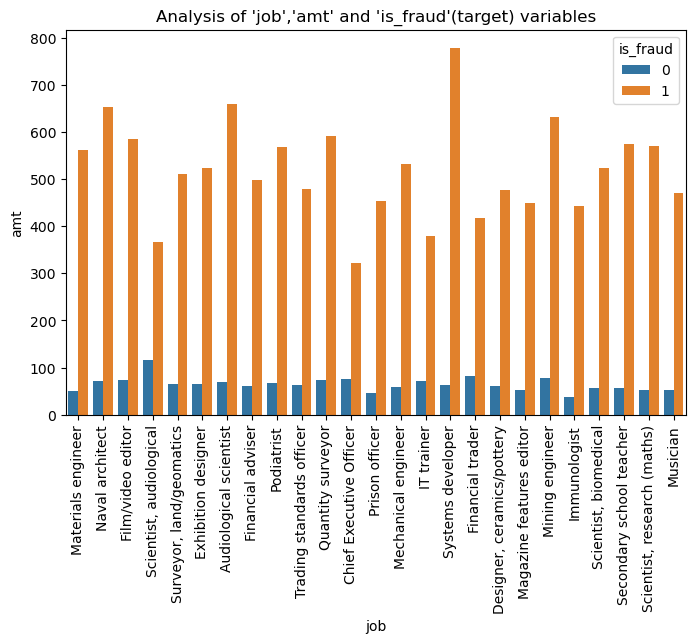

In [261]:
multi_var('job','amt')

In [ ]:
# Amount of txn of customers who work as System developer is hg and the chances of fraud increases with expence by cc increases

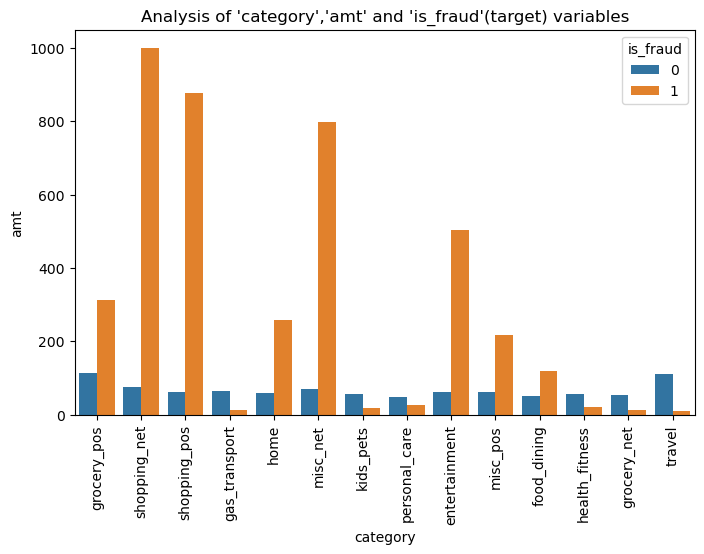

In [262]:
multi_var('category','amt')

In [ ]:
# Transaction done under ths catgory of shopping_net has high number of fraud txn

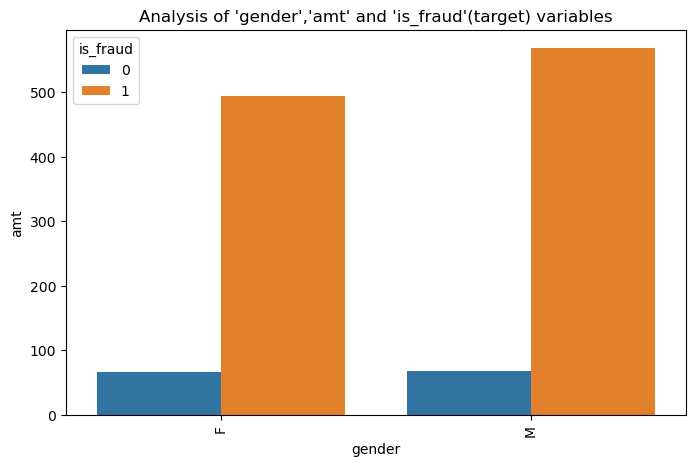

In [26]:
multi_var('gender','amt')

In [25]:
undersampled_df.head(2)

,cc_num,merchant,category,amt,gender,street,city,state,lat,long,city_pop,job,is_fraud,cust_name,age
0,676173792455,"fraud_Zieme, Bode and Dooley",gas_transport,86.19,F,07177 William Dale Apt. 547,Santa Monica,CA,34.0287,-118.4924,92043,"Civil engineer, contracting",0,Brittany Cox,62
1,30518206766474,fraud_Lind-Buckridge,entertainment,85.81,F,471 Marquez Prairie Suite 680,Matthews,MO,36.7154,-89.6287,1019,Aeronautical engineer,0,Tamara Martinez,44


In [ ]:
# Expense & fraud txn made by female customer are less. While they are high in male customers

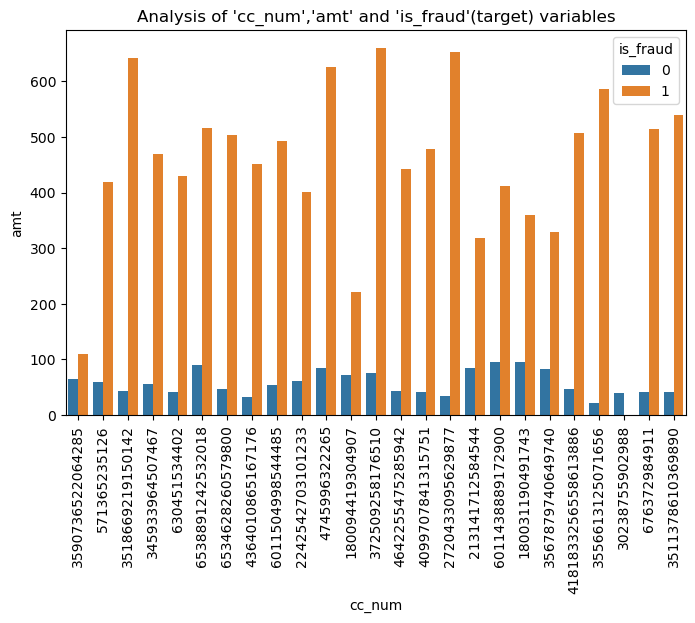

In [27]:
multi_var('cc_num','amt')

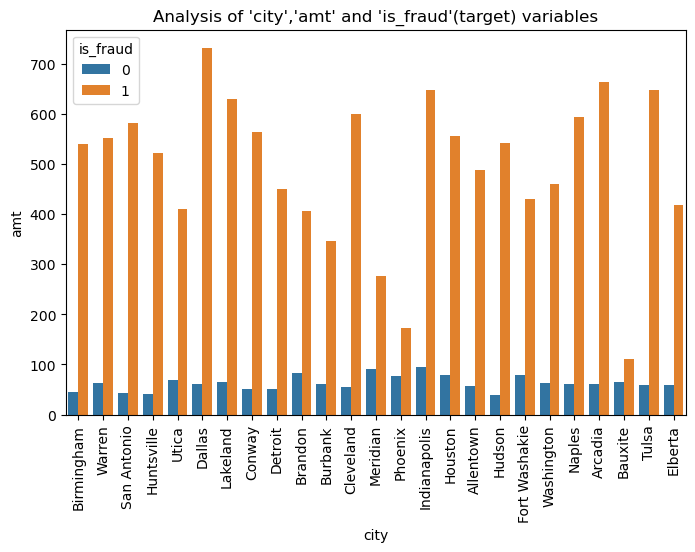

In [28]:
multi_var('city','amt')

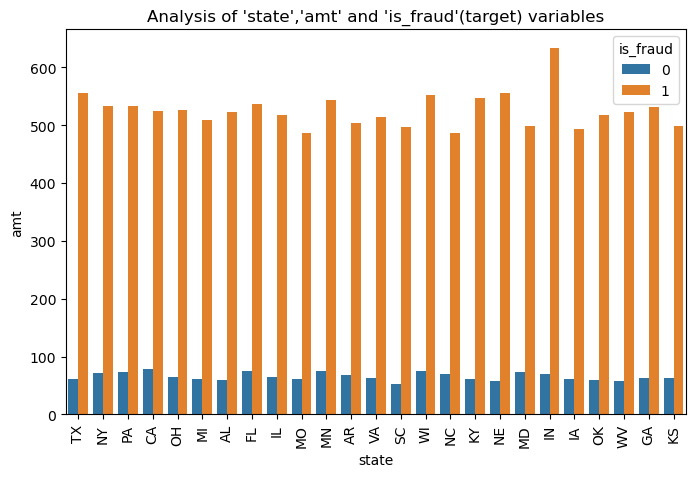

In [29]:
multi_var('state','amt')

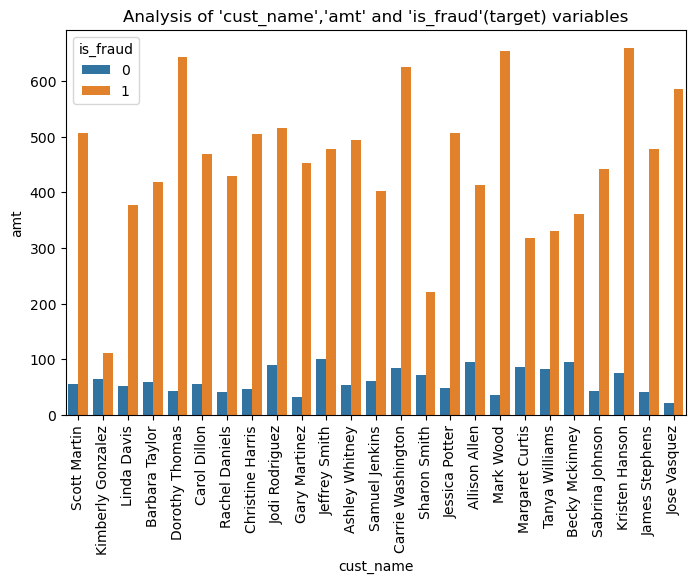

In [31]:
multi_var('cust_name','amt')

In [376]:
print(cat_col)

['merchant', 'category', 'gender', 'street', 'city', 'state', 'job', 'cust_name', 'cc_num']


In [377]:
# LabelEncoding the categorical columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()    

In [378]:
# Function for LabelEncoder

def label_enc(col):
    col=le.fit_transform(undersampled_df[col])
    return col


In [379]:
cat_col.remove('cc_num')

In [380]:
for i in cat_col:
    undersampled_df[i]=label_enc(i)

In [381]:
# Eventhough 'cc_num' column is in int datatype,it is a categorical col and label_encoder should be applied.
# So converting it to string and label_enc function is applied

undersampled_df['cc_num']='cc_'+undersampled_df['cc_num'].astype(str)

In [382]:
undersampled_df['cc_num']=label_enc('cc_num')

In [383]:
undersampled_df.head()

,cc_num,merchant,category,amt,gender,street,city,state,lat,long,city_pop,job,is_fraud,cust_name,age
0,966,691,2,86.19,0,72,728,4,34.0287,-118.4924,92043,85,0,125,62
1,183,389,0,85.81,0,476,486,24,36.7154,-89.6287,1019,15,0,894,44
2,696,217,4,99.30,0,493,400,38,39.9636,-79.7853,184,444,0,906,78
3,718,402,6,42.09,0,103,336,26,48.2777,-112.8456,743,489,0,587,51
4,269,175,11,4.24,0,711,409,42,36.4715,-82.4834,87124,486,0,742,36


In [384]:
# Finding the feature importance

# Splitting independent & dependent variables as x & y

x=undersampled_df.drop('is_fraud',axis=1)
y=undersampled_df['is_fraud']

In [385]:
from sklearn.ensemble import ExtraTreesClassifier

etc=ExtraTreesClassifier()
etc.fit(x,y)
fea_imp=etc.feature_importances_

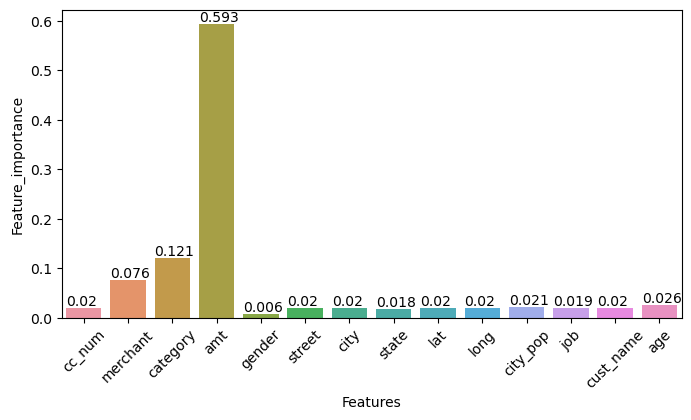

In [387]:
temp=pd.DataFrame(x.columns,fea_imp).reset_index()
plt.figure(figsize=(8,4))
ax=sns.barplot(x=0,y='index',data=temp)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),3),(p.get_x(),p.get_height()+0.005))
plt.xlabel('Features')
plt.ylabel('Feature_importance')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Top 5 features beased on their important values are:

# 'amt','category','merchant','age','city_pop'

In [160]:
# Contribution of top 5 important features

temp['index'].sort_values(ascending=False)[0:5].sum()

0.840096738931373

In [180]:
x=x[['amt','category','merchant','age','city_pop']]

In [186]:
# Train_Test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [275]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [276]:
rfc_pred=rfc.predict(X_test)

In [277]:
# Evaluation metrics

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc

def evalute(model,predicted,X_train,X_test,y_train,y_test):
    tr_score=model.score(X_train,y_train)
    te_score=model.score(X_test,y_test)
    acc_score=accuracy_score(y_test,predicted)
    pred_prob=model.predict_proba(X_test)[:,1]
    fpr,tpr,_=roc_curve(y_test,pred_prob)
    roc_auc_sc=auc(fpr,tpr)
    return tr_score,te_score,acc_score,roc_auc_sc,fpr,tpr
    

In [278]:
# Finding training,testing,accuracy scores

tr_score,te_score,acc_score,roc_auc_sc,fpr,tpr=evalute(rfc,rfc_pred,X_train,X_test,y_train,y_test)
print('Training score of RFC model:',tr_score)
print('Testing score of RFC model:',te_score)
print('Accuracy of RFC model is:',acc_score)
print('ROC_AUC score of RFC model is:',roc_auc_sc)

Training score of RFC model: 1.0
Testing score of RFC model: 0.9626998223801065
Accuracy of RFC model is: 0.9626998223801065
ROC_AUC score of RFC model is: 0.9934859721668516


In [279]:
# Function to evaluating confusion matrix

def conf_matrix(y_test,pred):
    cm=confusion_matrix(y_test,pred)
    plt.figure(figsize=(3,3))
    sns.heatmap(cm,annot=True,cbar=False,fmt='.5g')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Confusion matrix')
    return print('Classification report:''\n',classification_report(y_test,pred))

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      3003
           1       0.95      0.93      0.94      1501

    accuracy                           0.96      4504
   macro avg       0.96      0.96      0.96      4504
weighted avg       0.96      0.96      0.96      4504



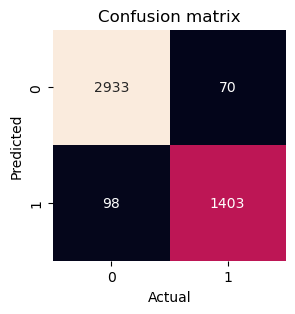

In [280]:
conf_matrix(y_test,rfc_pred)

In [281]:
# Function to visualize the AUC_curve 

def auc_curve(fpr,tpr):
    plt.figure(1)
    lw = 2
    plt.plot(fpr, tpr, color='green',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_sc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Area Under Curve')
    plt.legend(loc="lower right")
    plt.show()

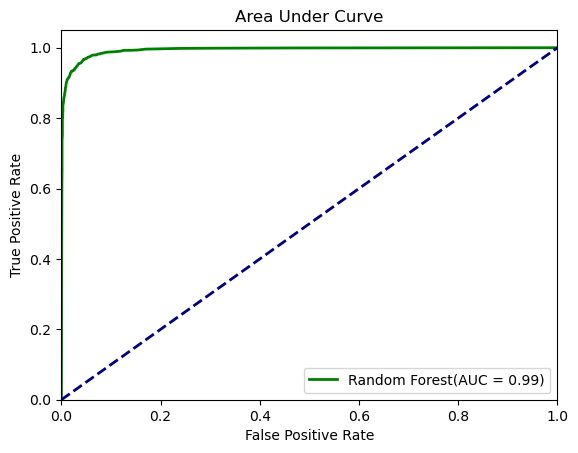

In [282]:
auc_curve(fpr,tpr)

In [266]:
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [263]:
# Hyperparameter tuning of Random Forest Classifier

param_grid = { 
    'n_estimators': [25,50,100,150], 
    'max_depth': [3,4,5], 
    'max_leaf_nodes': [3,4,5], 
} 

# define grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.903853 using {'max_depth': 3, 'max_leaf_nodes': 5, 'n_estimators': 150}
0.902206 (0.007533) with: {'max_depth': 3, 'max_leaf_nodes': 3, 'n_estimators': 25}
0.901391 (0.007099) with: {'max_depth': 3, 'max_leaf_nodes': 3, 'n_estimators': 50}
0.901447 (0.007229) with: {'max_depth': 3, 'max_leaf_nodes': 3, 'n_estimators': 100}
0.901410 (0.007108) with: {'max_depth': 3, 'max_leaf_nodes': 3, 'n_estimators': 150}
0.902613 (0.006825) with: {'max_depth': 3, 'max_leaf_nodes': 4, 'n_estimators': 25}
0.902779 (0.007126) with: {'max_depth': 3, 'max_leaf_nodes': 4, 'n_estimators': 50}
0.902724 (0.007552) with: {'max_depth': 3, 'max_leaf_nodes': 4, 'n_estimators': 100}
0.903075 (0.007116) with: {'max_depth': 3, 'max_leaf_nodes': 4, 'n_estimators': 150}
0.903667 (0.006892) with: {'max_depth': 3, 'max_leaf_nodes': 5, 'n_estimators': 25}
0.903760 (0.007242) with: {'max_depth': 3, 'max_leaf_nodes': 5, 'n_estimators': 50}
0.903797 (0.007125) with: {'max_depth': 3, 'max_leaf_nodes': 5, 'n_estimator

In [270]:
rfc_hp=RandomForestClassifier(n_estimators= 150,max_depth= 3, max_leaf_nodes= 5)
rfc_hp.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_leaf_nodes=5, n_estimators=150)

In [271]:
rfc_hp_pred=rfc_hp.predict(X_test)

In [285]:
# Finding training,testing,accuracy scores

tr_score,te_score,acc_score,roc_auc_sc,fpr,tpr=evalute(rfc_hp,rfc_hp_pred,X_train,X_test,y_train,y_test)
print('Training score of RFC model:',tr_score)
print('Testing score of RFC model:',te_score)
print('Accuracy of RFC model is:',acc_score)
print('ROC_AUC score of RFC model is:',roc_auc_sc)

Training score of RFC model: 0.9040190962584657
Testing score of RFC model: 0.8956483126110124
Accuracy of RFC model is: 0.8956483126110124
ROC_AUC score of RFC model is: 0.9393067514320013


Classification report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      3003
           1       0.94      0.74      0.82      1501

    accuracy                           0.90      4504
   macro avg       0.91      0.86      0.88      4504
weighted avg       0.90      0.90      0.89      4504



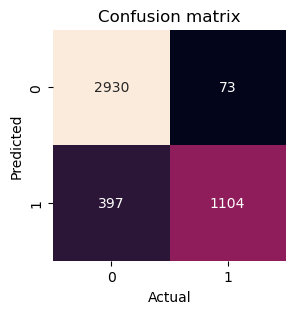

In [286]:
conf_matrix(y_test,rfc_hp_pred)

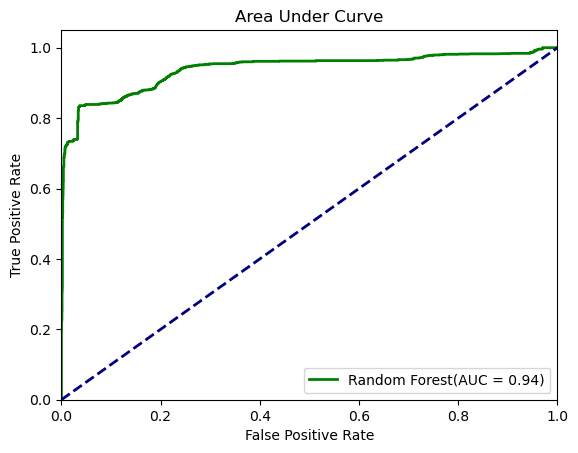

In [287]:
auc_curve(fpr,tpr)

In [288]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [289]:
lr_pred=lr.predict(X_test)


In [290]:
# Finding training,testing,accuracy scores

tr_score,te_score,acc_score,roc_auc_sc,fpr,tpr=evalute(lr,lr_pred,X_train,X_test,y_train,y_test)
print('Training score of RFC model:',tr_score)
print('Testing score of RFC model:',te_score)
print('Accuracy of RFC model is:',acc_score)
print('ROC_AUC score of RFC model is:',roc_auc_sc)

Training score of RFC model: 0.8687132230487399
Testing score of RFC model: 0.8596802841918295
Accuracy of RFC model is: 0.8596802841918295
ROC_AUC score of RFC model is: 0.8296662254024012


Classification report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      3003
           1       0.91      0.64      0.75      1501

    accuracy                           0.86      4504
   macro avg       0.88      0.81      0.83      4504
weighted avg       0.87      0.86      0.85      4504



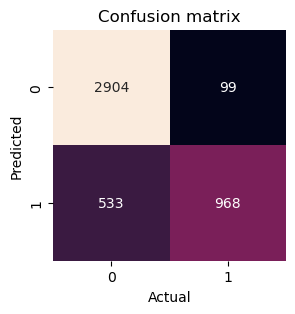

In [291]:
conf_matrix(y_test,lr_pred)

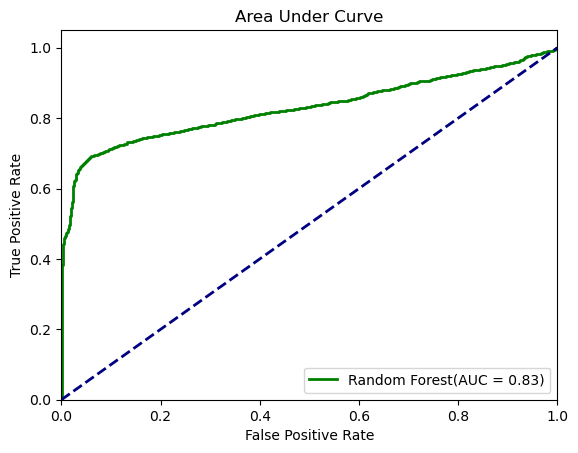

In [292]:
auc_curve(fpr,tpr)

In [251]:
# Hyperparameter tuning of Logistic regression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.899819 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.899819 (0.007673) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.873654 (0.011526) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.876060 (0.009241) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.899652 (0.007697) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.873284 (0.011674) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.875226 (0.009455) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.899745 (0.007623) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.874616 (0.011448) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.878298 (0.010584) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.899634 (0.007623) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.872155 (0.010944) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.876373 (0.009673) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.899763 (0.007669) wit

In [293]:
lr=LogisticRegression(C=100,solver='newton-cg')

In [294]:
lr.fit(X_train,y_train)

LogisticRegression(C=100, solver='newton-cg')

In [295]:
lr_pred=lr.predict(X_test)

In [296]:
# Finding training,testing,accuracy scores

tr_score,te_score,acc_score,roc_auc_sc,fpr,tpr=evalute(lr,lr_pred,X_train,X_test,y_train,y_test)
print('Training score of RFC model:',tr_score)
print('Testing score of RFC model:',te_score)
print('Accuracy of RFC model is:',acc_score)
print('ROC_AUC score of RFC model is:',roc_auc_sc)

Training score of RFC model: 0.9000222049517043
Testing score of RFC model: 0.894316163410302
Accuracy of RFC model is: 0.894316163410302
ROC_AUC score of RFC model is: 0.8427612804694748


Classification report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      3003
           1       0.94      0.73      0.82      1501

    accuracy                           0.89      4504
   macro avg       0.91      0.85      0.87      4504
weighted avg       0.90      0.89      0.89      4504



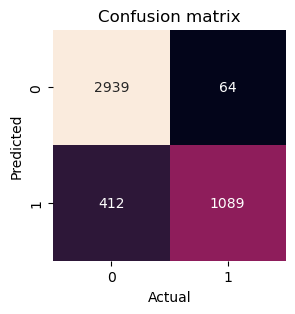

In [297]:
conf_matrix(y_test,lr_pred)

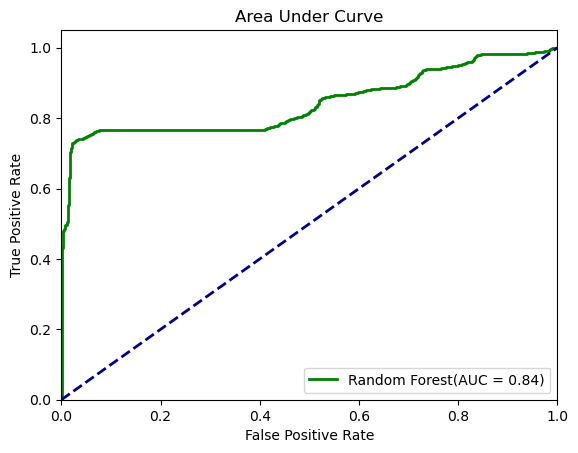

In [298]:
auc_curve(fpr,tpr)

In [389]:
# Among all, tuned Random Forest classifier is choosen as others have overfitting and less accurate

model=rfc_hp

In [ ]:
# Saving the model

In [390]:
import joblib

joblib.dump(model,'cc_fraud_detection.pkl')

['cc_fraud_detection.pkl']

In [399]:
model1=joblib.load('cc_fraud_detection.pkl')

In [401]:
model1.predict([[850,10,120,35,35000]])[0]

1